# I. Import Dataset

## 1.1 Upload and Overview

In [1]:
import pandas as pd

# Load the first few lines of each file to inspect their structure
file_paths = [
    r"D:\GitHub\UEL-Course\Social Media Analytics\Data\comments_tiktok1.csv",
    r"D:\GitHub\UEL-Course\Social Media Analytics\Data\comments_tiktok2.csv",
    r"D:\GitHub\UEL-Course\Social Media Analytics\Data\comments_tiktok3.csv",
    r"D:\GitHub\UEL-Course\Social Media Analytics\Data\comments_tiktok4.csv",
    r"D:\GitHub\UEL-Course\Social Media Analytics\Data\comments_tiktok5.csv",
    r"D:\GitHub\UEL-Course\Social Media Analytics\Data\comments.csv"
]

# Inspect the first few lines of each file
file_previews = {path: pd.read_csv(path, nrows=5) for path in file_paths}
file_previews_keys = list(file_previews.keys())
file_previews[file_previews_keys[0]], file_previews[file_previews_keys[1]], file_previews[file_previews_keys[2]], file_previews[file_previews_keys[3]], file_previews[file_previews_keys[4]], file_previews[file_previews_keys[5]]


(                                             Comment  \
 0                                             quá đã   
 1  Thôi anhoi111111111111111111111111111111111111...   
 2                        Nhà xe nào bị thanh tra vậy   
 3                                       Đi tàu nhé 😅   
 4                                ui tin real hả mn😳😳   
 
                                                 Link  
 0  https://www.tiktok.com/@lipovitan.vn/video/731...  
 1  https://www.tiktok.com/@lipovitan.vn/video/731...  
 2  https://www.tiktok.com/@lipovitan.vn/video/731...  
 3  https://www.tiktok.com/@lipovitan.vn/video/731...  
 4  https://www.tiktok.com/@lipovitan.vn/video/731...  ,
                                              Comment  \
 0                                   Ko có đà nẵng :<   
 1                                  Bẻ lái khét quá 😂   
 2                          Ước được đi phi cơ riêng🤡   
 3                  redbull chiếm trọn trái tim bạn ❤   
 4  Về Việt Nam k biết có thay đổi

In [2]:
# Combine all files into one DataFrame
combined_df = pd.concat([pd.read_csv(file) for file in file_paths])

# Save the combined DataFrame to a new CSV file
combined_csv_path = r"D:\GitHub\UEL-Course\Social Media Analytics\Data\combined_comments.csv"
combined_df.to_csv(combined_csv_path, index=False)

combined_csv_path


'D:\\GitHub\\UEL-Course\\Social Media Analytics\\Data\\combined_comments.csv'

In [3]:
df_org = pd.read_csv(r'D:\GitHub\UEL-Course\Social Media Analytics\Data\combined_comments.csv', )
df = df_org.copy()
df.head()

Comment  \
0                                             quá đã   
1  Thôi anhoi111111111111111111111111111111111111...   
2                        Nhà xe nào bị thanh tra vậy   
3                                       Đi tàu nhé 😅   
4                                ui tin real hả mn😳😳   

                                                Link  
0  https://www.tiktok.com/@lipovitan.vn/video/731...  
1  https://www.tiktok.com/@lipovitan.vn/video/731...  
2  https://www.tiktok.com/@lipovitan.vn/video/731...  
3  https://www.tiktok.com/@lipovitan.vn/video/731...  
4  https://www.tiktok.com/@lipovitan.vn/video/731...

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2575 entries, 0 to 2574
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Comment  2544 non-null   object
 1   Link     2575 non-null   object
dtypes: object(2)
memory usage: 40.4+ KB


In [5]:
df.describe()

Comment                                               Link
count       2544                                               2575
unique      1927                                                106
top     Thanh Lê  https://www.tiktok.com/@lipovitan.vn/video/709...
freq          18                                                296

## 1.2 Dealing with null and duplicated row

In [6]:
# Check for null values and duplicated rows
null_values = df.isnull().sum()
duplicated_rows = df.duplicated().sum()

null_values, duplicated_rows


(Comment    31
 Link        0
 dtype: int64,
 366)

In [7]:
# Remove duplicated rows
df = df.drop_duplicates()

# Check the shape of the dataframe after removing duplicates
shape_after_deduplication = df.shape

shape_after_deduplication


(2209, 2)

In [8]:
# Check for null values and duplicated rows
null_values = df.isnull().sum()
duplicated_rows = df.duplicated().sum()

null_values, duplicated_rows


(Comment    2
 Link       0
 dtype: int64,
 0)

In [9]:
# Remove rows with null values in the 'Comment' column
df = df.dropna(subset=['Comment'])

# Check the shape of the dataframe after removing null values
shape_after_null_removal = df.shape

shape_after_null_removal


(2207, 2)

# II. EDA

## 2.1 Comment Length Analysis

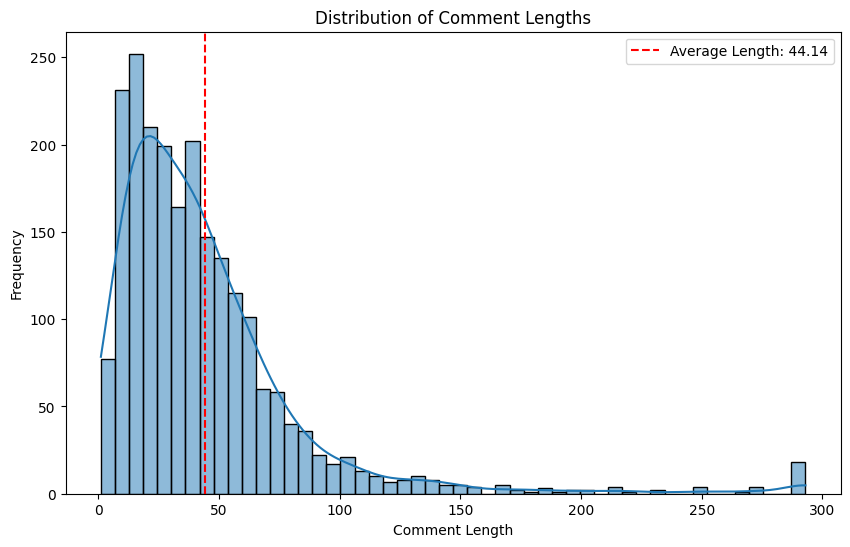

In [10]:
# Calculate the length of each comment
df['Comment_Length'] = df['Comment'].apply(len)

# Calculate the average length of comments
average_comment_length = df['Comment_Length'].mean()

# Plot the distribution of comment lengths
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['Comment_Length'], bins=50, kde=True)
plt.title('Distribution of Comment Lengths')
plt.xlabel('Comment Length')
plt.ylabel('Frequency')
plt.axvline(average_comment_length, color='r', linestyle='--', label=f'Average Length: {average_comment_length:.2f}')
plt.legend()
plt.show()


In [11]:
# Calculate Q1, Q3, and IQR
Q1 = df['Comment_Length'].quantile(0.25)
Q3 = df['Comment_Length'].quantile(0.75)
IQR = Q3 - Q1

# Define the threshold for outliers
outlier_threshold = Q3 + 1.5 * IQR

# Filter the dataframe to find the outliers
long_comments = df[df['Comment_Length'] > outlier_threshold]

# Display the outliers
long_comments[['Comment', 'Comment_Length']].sort_values(by='Comment_Length', ascending=False)

print( long_comments['Comment'])


1       Thôi anhoi111111111111111111111111111111111111...
70      Hồi đó nhớ đi chung xe với mẹ nằm 1 cái dường ...
95      ngày trước bán vé xe thág tết mệt lã người luô...
105     đi xe thà đi tàu mình hcm về thanh hóa 12 năm ...
203     Lúc nhỏ thì em rất thích Tết nhưng bây giờ em ...
                              ...                        
2533    Author\nNước Tăng Lực Lipovitan\nAnh Tran Bạn ...
2541    Author\nNước Tăng Lực Lipovitan\nCổ Quốc Tuấn ...
2543    Nước Tăng Lực Lipovitan\nTuấn Trường Bạn tham ...
2559    Author\nNước Tăng Lực Lipovitan\nThanh Huy Cha...
2566    Author\nNước Tăng Lực Lipovitan\nThao Thu Hihi...
Name: Comment, Length: 104, dtype: object


- **Need more knowledge about NLP in VietNam**

## 2.2 Sentiment Analysis

In [12]:
from textblob import TextBlob
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
df['Polarity'] = df['Comment'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['Sentiment'] = pd.cut(df['Polarity'], bins=3, labels=["Negative", "Neutral", "Positive"])

In [14]:
df

Comment  \
0                                                quá đã   
1     Thôi anhoi111111111111111111111111111111111111...   
2                           Nhà xe nào bị thanh tra vậy   
3                                          Đi tàu nhé 😅   
4                                   ui tin real hả mn😳😳   
...                                                 ...   
2568           Minh Thiên\nChỉ vĩnh phúc mới có mà thôi   
2569  Author\nNước Tăng Lực Lipovitan\nMinh Thiên Mo...   
2570    Ng Vương Gia Long\nlike hộ tus acc mới up nha b   
2571  Ng Vương Gia Long\nlike cho glong tus acc mới ...   
2572                                Huyen Chi\nttql nhó   

                                                   Link  Comment_Length  \
0     https://www.tiktok.com/@lipovitan.vn/video/731...               6   
1     https://www.tiktok.com/@lipovitan.vn/video/731...             149   
2     https://www.tiktok.com/@lipovitan.vn/video/731...              27   
3     https://www.tiktok.com/@lipovitan.vn/video/731...              12   
4     https://www.tiktok.com/@lipovitan.vn/video/731...              19   
...                                                 ...             ...   
2568  https://www.facebook.com/Lipovitan.vn/posts/pf...              39   
2569  https://www.facebook.com/Lipovitan.vn/posts/pf...              94   
2570  https://www.facebook.com/Lipovitan.vn/posts/pf...              46   
2571  https://www.facebook.com/Lipovitan.vn/posts/pf...              63   
2572  https://www.facebook.com/Lipovitan.vn/posts/pf...              18   

      Polarity Sentiment  
0         0.00   Neutral  
1         0.00   Neutral  
2         0.00   Neutral  
3         0.00   Neutral  
4         0.20   Neutral  
...        ...       ...  
2568      0.00   Neutral  
2569      0.00   Neutral  
2570     -0.05   Neutral  
2571     -0.05   Neutral  
2572      0.00   Neutral  

[2207 rows x 5 columns]

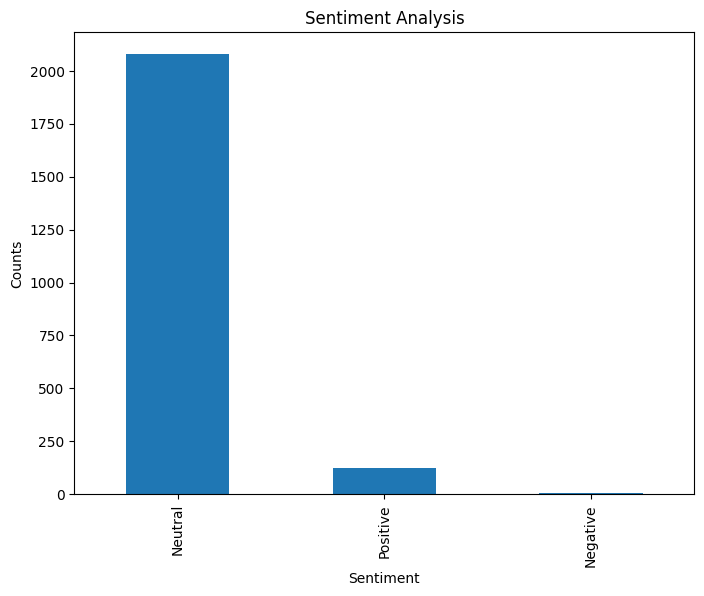

In [15]:

sentiment_counts = df['Sentiment'].value_counts()
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar')
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
plt.show()


- Find out that NOT WORKING WELL with comment from VietNam so we can try another method
- 5. Transformers từ Hugging Face
    - Thư viện Transformers của Hugging Face cung cấp một kho lớn các mô hình NLP tiên tiến được đào tạo trước, bao gồm các mô hình hỗ trợ tiếng Việt như BERT, XLM-R, và PhoBERT. Đây là một công cụ mạnh mẽ cho việc phân tích ngữ nghĩa, phân loại văn bản, và nhiều tác vụ NLP khác.
    - Để sử dụng thư viện Transformers từ Hugging Face cho việc phân tích cảm xúc (sentiment analysis) với dữ liệu tiếng Việt, bạn có thể chọn sử dụng PhoBERT, một mô hình BERT được tiền huấn luyện trên dữ liệu tiếng Việt. 

In [16]:
!pip install transformers torch

In [17]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer
from torch.nn.functional import softmax
import torch

# Tải tokenizer và mô hình
tokenizer = AutoTokenizer.from_pretrained("vinai/phobert-base")
model = AutoModelForSequenceClassification.from_pretrained("vinai/phobert-base", num_labels=3)

# Hàm phân tích cảm xúc
def analyze_sentiment(text):
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=256)
    outputs = model(**inputs)
    probs = softmax(outputs.logits, dim=1)
    sentiment = torch.argmax(probs, dim=1).numpy()[0]
    sentiment_mapping = {0: "Tiêu cực", 1: "Trung tính", 2: "Tích cực"}
    return sentiment_mapping[sentiment], probs[0][sentiment].item()

# Ví dụ về việc phân tích cảm xúc
text = "Sản phẩm này rất tuyệt vời"
sentiment, confidence = analyze_sentiment(text)
print(f"Cảm xúc: {sentiment}, Độ tin cậy: {confidence:.4f}")


c:\Users\thanh\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at vinai/phobert-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Cảm xúc: Trung tính, Độ tin cậy: 0.3912


In [18]:
'''
from transformers import AutoModelForSequenceClassification, AutoTokenizer
from torch.nn.functional import softmax
import torch

# Khởi tạo tokenizer và mô hình PhoBERT
tokenizer = AutoTokenizer.from_pretrained("vinai/phobert-base")
model = AutoModelForSequenceClassification.from_pretrained("vinai/phobert-base", num_labels=3)

# Hàm phân tích cảm xúc cho mỗi bình luận
def analyze_sentiment(text):
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=256)
    with torch.no_grad():  # Không cần tính gradient
        outputs = model(**inputs)
    probs = softmax(outputs.logits, dim=1)
    sentiment = torch.argmax(probs, dim=1).numpy()[0]
    sentiment_mapping = {0: "Tiêu cực", 1: "Trung tính", 2: "Tích cực"}
    return sentiment_mapping[sentiment]

# Áp dụng hàm phân tích cảm xúc lên cột bình luận
# Thay 'cột_bình_luận' bằng tên thực tế của cột chứa bình luận trong DataFrame của bạn
df['sentiment'] = df['Comment'].apply(analyze_sentiment)
'''

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at vinai/phobert-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


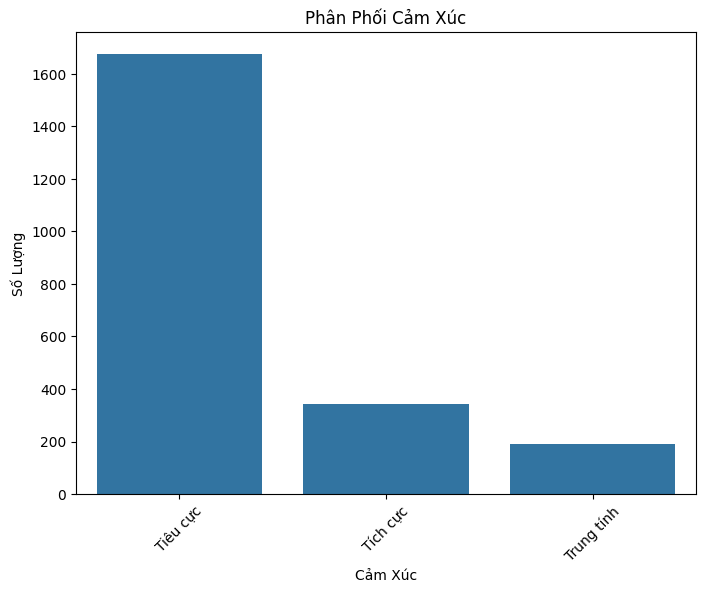

In [19]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=df, order = df['sentiment'].value_counts().index)
plt.title('Phân Phối Cảm Xúc')
plt.xlabel('Cảm Xúc')
plt.ylabel('Số Lượng')
plt.xticks(rotation=45)
plt.show()


## 2.3 Frequency Analysis

In [20]:
pip install nltk wordcloud matplotlib



   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.4 kB ? eta -:--:--
   --- ----------------------------------- 30.7/301.4 kB 220.2 kB/s eta 0:00:02
   ------- ------------------------------- 61.4/301.4 kB 328.2 kB/s eta 0:00:01
   --------------------- ---------------- 174.1/301.4 kB 876.1 kB/s eta 0:00:01
   ---------------------------------------- 301.4/301.4 kB 1.2 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\thanh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\thanh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


[('lipovitan', 537), ('nước', 451), ('lực', 401), ('tăng', 390), ('author', 292), ('có', 256), ('nguyễn', 256), ('uống', 213), ('bạn', 187), ('này', 150)]


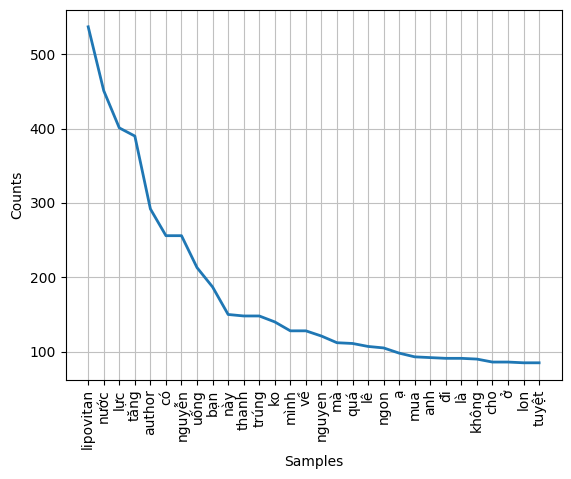

In [21]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

# Đảm bảo rằng bạn đã tải xuống bộ dữ liệu stopwords
nltk.download('punkt')
nltk.download('stopwords')

# Kết hợp tất cả các bình luận thành một chuỗi lớn
text = " ".join(comment for comment in df['Comment'])

# Tokenize văn bản
tokens = word_tokenize(text)

# Chuyển tất cả các từ về dạng chữ thường để đồng nhất
words = [word.lower() for word in tokens if word.isalpha()]

# Lọc bỏ stopwords (bạn cần điều chỉnh cho phù hợp với tiếng Việt)
stop_words = set(stopwords.words('english')) # Sử dụng 'vietnamese' nếu có
words = [word for word in words if word not in stop_words]

# Tính toán tần suất xuất hiện của từ
fdist = FreqDist(words)

# In 10 từ xuất hiện nhiều nhất
print(fdist.most_common(10))

# Vẽ biểu đồ tần suất của 30 từ xuất hiện nhiều nhất
fdist.plot(30, cumulative=False)
plt.show()


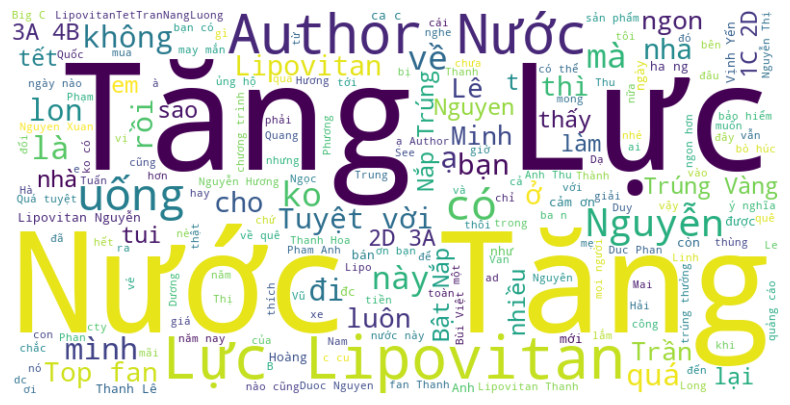

In [22]:
from wordcloud import WordCloud

# Tạo đám mây từ
wordcloud = WordCloud(width = 800, height = 400, background_color ='white').generate(text)

# Hiển thị đám mây từ
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


## 2.4. Link Analysis

In [23]:
import pandas as pd
import re

# Hàm để tìm kiếm và trả về tất cả URLs trong một chuỗi văn bản
def extract_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.findall(text)

# Áp dụng hàm trên cho mỗi bình luận và tạo một list chứa tất cả URLs
all_urls = []
df['Comment'].apply(lambda x: all_urls.extend(extract_urls(x)))

# Bạn cũng có thể muốn lọc bỏ các phần mở rộng tệp tin để chỉ tập trung vào các liên kết cơ bản


0       None
1       None
2       None
3       None
4       None
        ... 
2568    None
2569    None
2570    None
2571    None
2572    None
Name: Comment, Length: 2207, dtype: object

In [25]:
from collections import Counter

# Tính toán tần suất xuất hiện của mỗi URL
url_counts = Counter(all_urls)

# Lấy ra 10 URLs xuất hiện nhiều nhất
most_common_urls = url_counts.most_common(10)
most_common_urls


[('https://tiki.vn/.../nuoc-uong-tang-luc-lipovitan-250ml...', 2),
 ('https://bit.ly/lipovitantiki', 2),
 ('https://tiki.vn/thung-24-lon-250ml-lipovitan-tongkat-ali...', 2),
 ('https://vt.tiktok.com/ZSdn3ju7e/?k=1', 1),
 ('https://…', 1),
 ('https://docs.google.com/spre…', 1),
 ('https://tiki.vn/nuo…', 1),
 ('https://tiki.vn/nuoc-uong-tang-luc-lipovitan-thung-thuong...', 1),
 ('https://tiki.vn/di-cho-online/nuoc-uong-tang-l…', 1),
 ('https://www.bachhoaxanh.com/.../thung-24-lon-nuoc-tang...', 1)]

# 2.5 6. Engagement Metrics
- Comments per Post: Calculate the average number of comments per post or video to gauge engagement levels.
- Engagement Trends: Identify which types of content (based on the link or content description) generate more engagement.

In [26]:
df

Comment  \
0                                                quá đã   
1     Thôi anhoi111111111111111111111111111111111111...   
2                           Nhà xe nào bị thanh tra vậy   
3                                          Đi tàu nhé 😅   
4                                   ui tin real hả mn😳😳   
...                                                 ...   
2568           Minh Thiên\nChỉ vĩnh phúc mới có mà thôi   
2569  Author\nNước Tăng Lực Lipovitan\nMinh Thiên Mo...   
2570    Ng Vương Gia Long\nlike hộ tus acc mới up nha b   
2571  Ng Vương Gia Long\nlike cho glong tus acc mới ...   
2572                                Huyen Chi\nttql nhó   

                                                   Link  Comment_Length  \
0     https://www.tiktok.com/@lipovitan.vn/video/731...               6   
1     https://www.tiktok.com/@lipovitan.vn/video/731...             149   
2     https://www.tiktok.com/@lipovitan.vn/video/731...              27   
3     https://www.tiktok.com/@lipovitan.vn/video/731...              12   
4     https://www.tiktok.com/@lipovitan.vn/video/731...              19   
...                                                 ...             ...   
2568  https://www.facebook.com/Lipovitan.vn/posts/pf...              39   
2569  https://www.facebook.com/Lipovitan.vn/posts/pf...              94   
2570  https://www.facebook.com/Lipovitan.vn/posts/pf...              46   
2571  https://www.facebook.com/Lipovitan.vn/posts/pf...              63   
2572  https://www.facebook.com/Lipovitan.vn/posts/pf...              18   

      Polarity Sentiment sentiment  
0         0.00   Neutral  Tích cực  
1         0.00   Neutral  Tiêu cực  
2         0.00   Neutral  Tiêu cực  
3         0.00   Neutral  Tiêu cực  
4         0.20   Neutral  Tiêu cực  
...        ...       ...       ...  
2568      0.00   Neutral  Tích cực  
2569      0.00   Neutral  Tiêu cực  
2570     -0.05   Neutral  Tiêu cực  
2571     -0.05   Neutral  Tiêu cực  
2572      0.00   Neutral  Tích cực  

[2207 rows x 6 columns]

In [27]:
# Tính Số Bình Luận Mỗi Bài Đăng
comments_per_post = df.groupby('Link').size()

# Tính số bình luận trung bình mỗi bài đăng
average_comments = comments_per_post.mean()
print(f"Số bình luận trung bình mỗi bài đăng: {average_comments}")


Số bình luận trung bình mỗi bài đăng: 21.01904761904762


In [28]:
# Xác Định Nội Dung Tạo Ra Nhiều Tương Tác Nhất
engagement_by_content = df.groupby('Link').size().sort_values(ascending=False)

print(engagement_by_content)


Link
https://www.tiktok.com/@lipovitan.vn/video/7319370995943410952?is_from_webapp=1&sender_device=pc&web_id=7354348540027602449                                                                                                                                                                                                                                                                        99
https://www.tiktok.com/@lipovitan.vn/video/7319370370090274056?is_from_webapp=1&sender_device=pc&web_id=7354349897120171521                                                                                                                                                                                                                                                                        91
https://www.tiktok.com/@lipovitan.vn/video/7319370477871336711?is_from_webapp=1&sender_device=pc&web_id=7354349897120171521                                                                                            

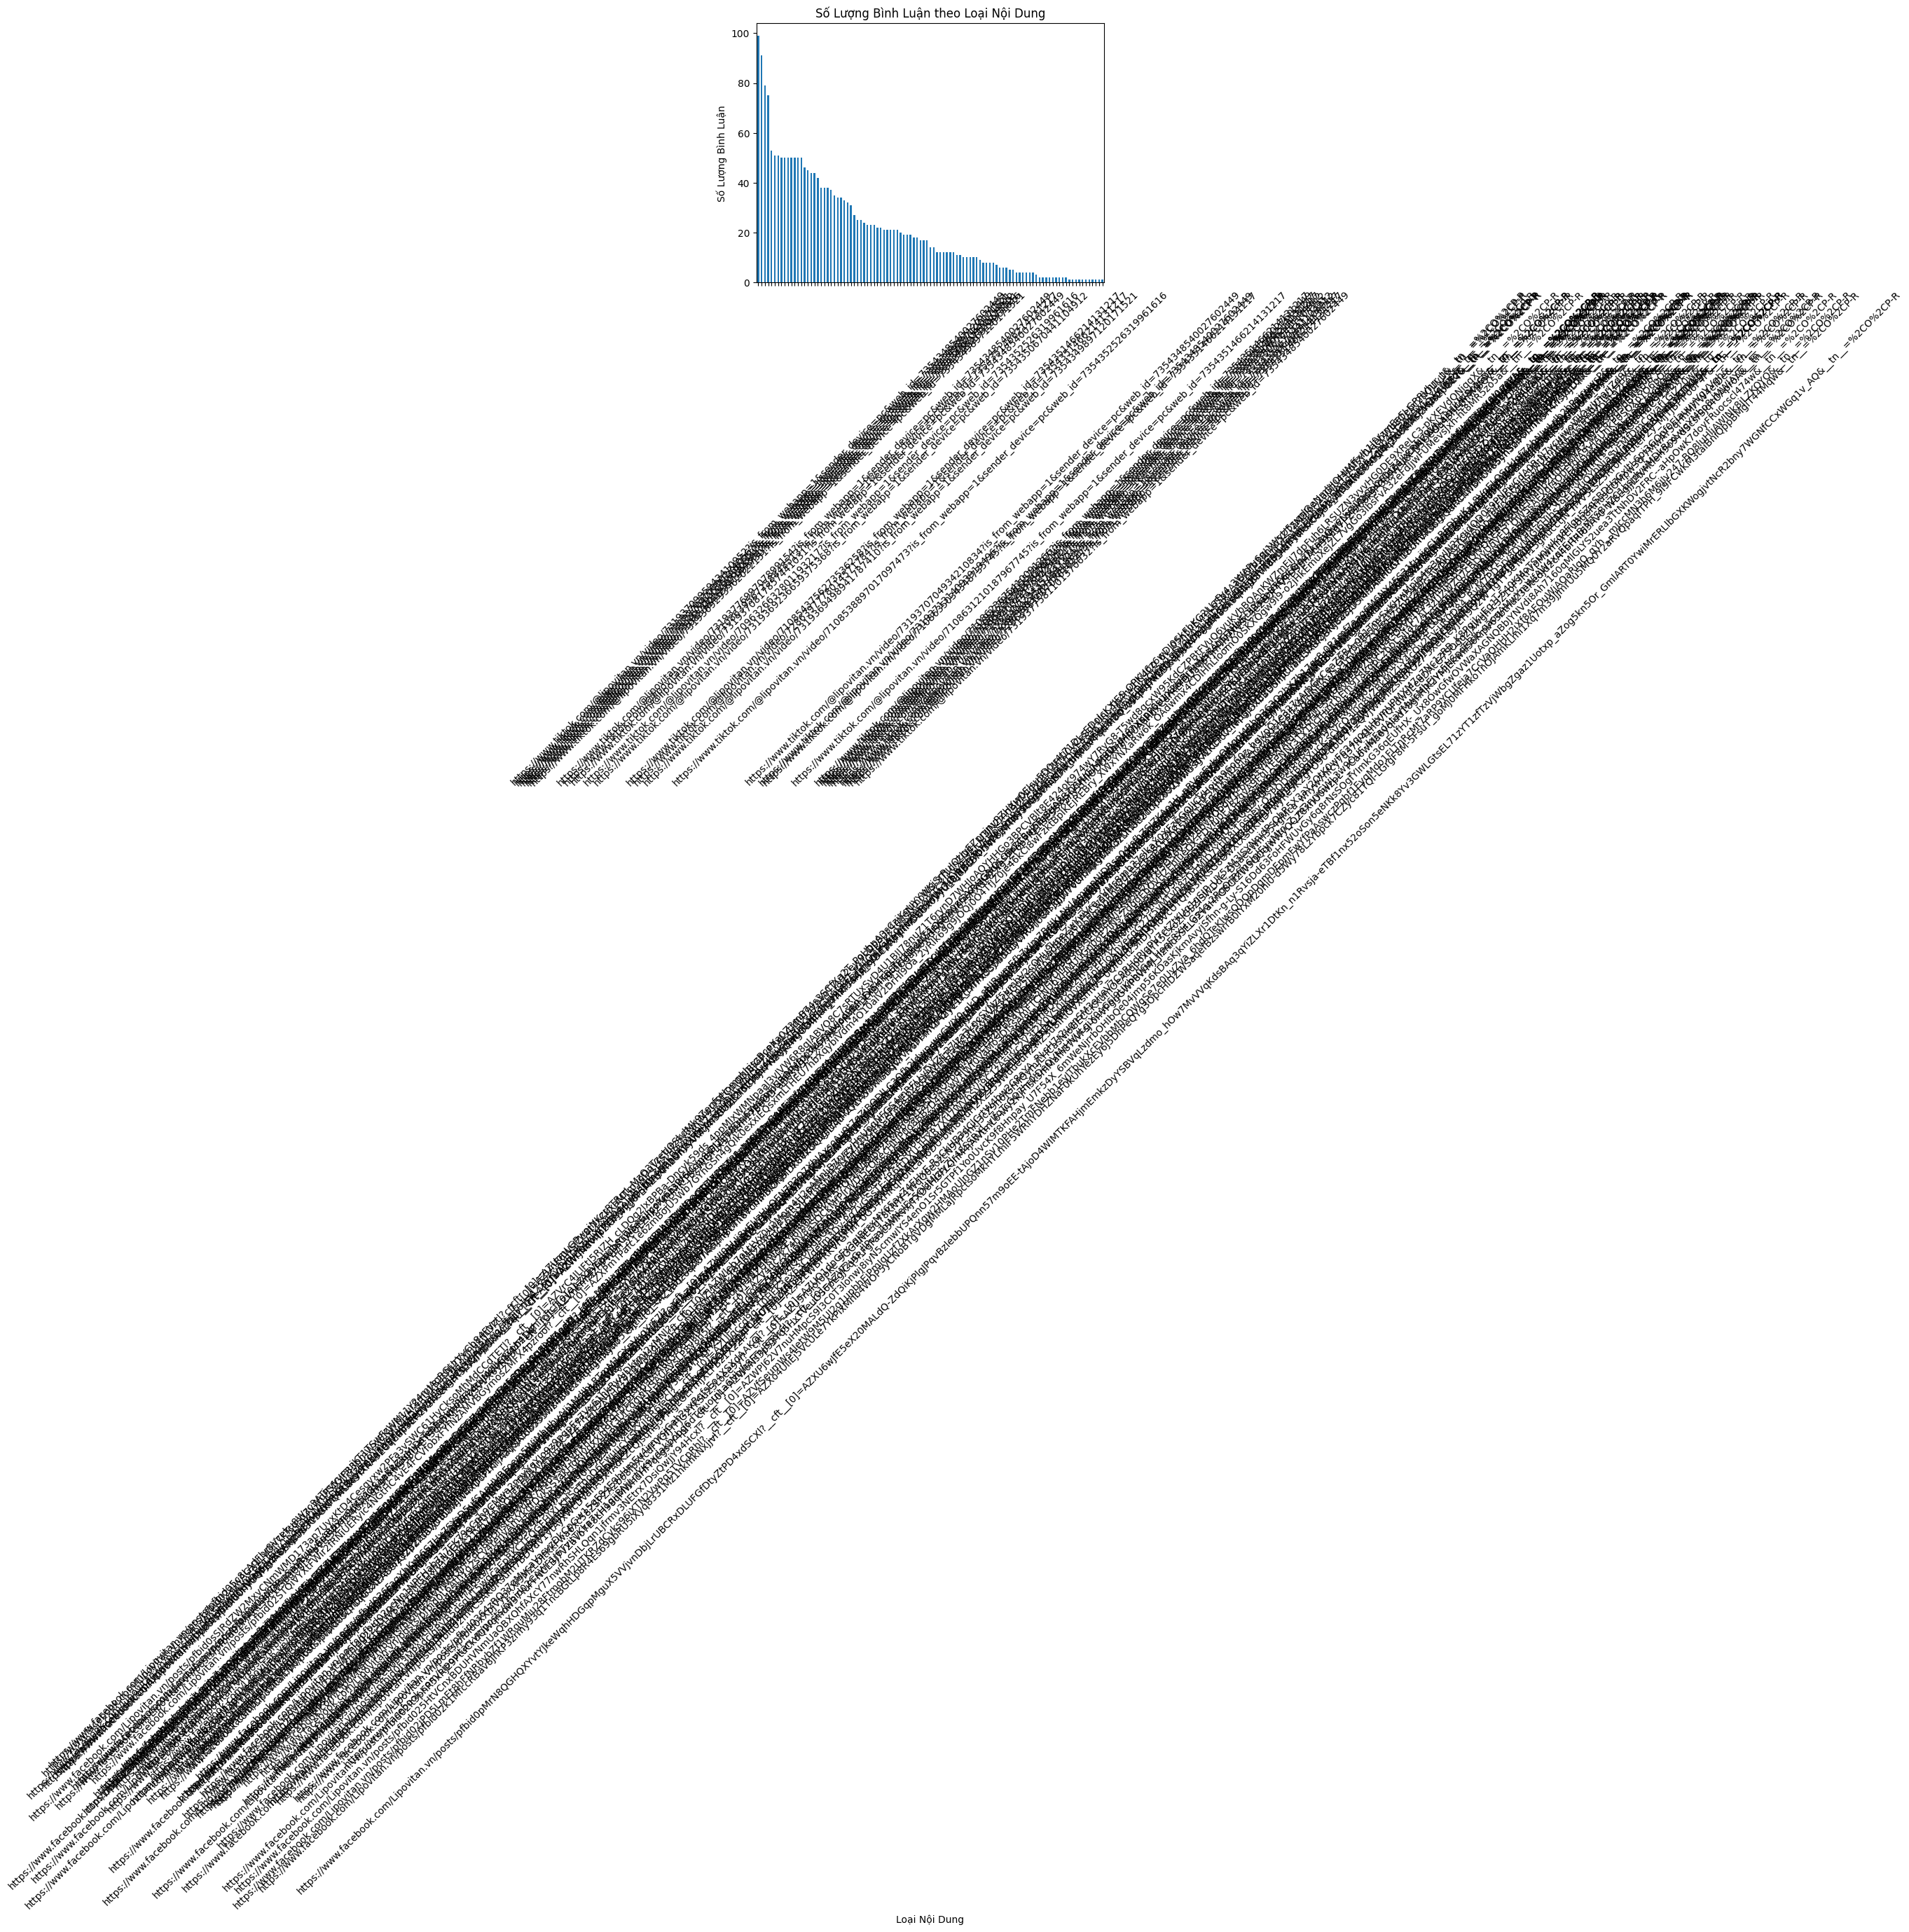

In [29]:
import matplotlib.pyplot as plt

engagement_by_content.plot(kind='bar')
plt.title('Số Lượng Bình Luận theo Loại Nội Dung')
plt.xlabel('Loại Nội Dung')
plt.ylabel('Số Lượng Bình Luận')
plt.xticks(rotation=45)
plt.show()
